In [1]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pylab as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Cargar Dataset preprocesado en Knime

In [2]:
series = pd.read_csv('./DataMiningUSA/DataEntrenamiento1.csv')

series.head()

,DateTime,Carvajal - Sevillana,Centro de Alto Rendimiento,Fontibon,Guaymaral,Kennedy,Las Ferias,Puente Aranda,San Cristobal,Suba,Usaquen,MinAmbiente,Movil 7ma,Tunal
0,2019-01-01 01:00:00,19,7,16,12,38,7,0,5,19,20,12,18,53
1,2019-01-01 02:00:00,23,20,36,7,75,13,6,11,30,10,6,22,74
2,2019-01-01 03:00:00,37,27,35,8,74,17,13,19,27,15,7,32,59
3,2019-01-01 04:00:00,38,21,29,12,37,11,13,27,48,10,11,46,46
4,2019-01-01 05:00:00,35,15,20,9,24,12,12,29,45,8,11,44,44


### Mapeo de los datos presentes en cada estación.

In [3]:
series['DateTime'] = pd.to_datetime(series['DateTime'], format= '%Y-%m-%d %H:%M:%S')
a = series["DateTime"][0]
type(a)

pandas._libs.tslibs.timestamps.Timestamp

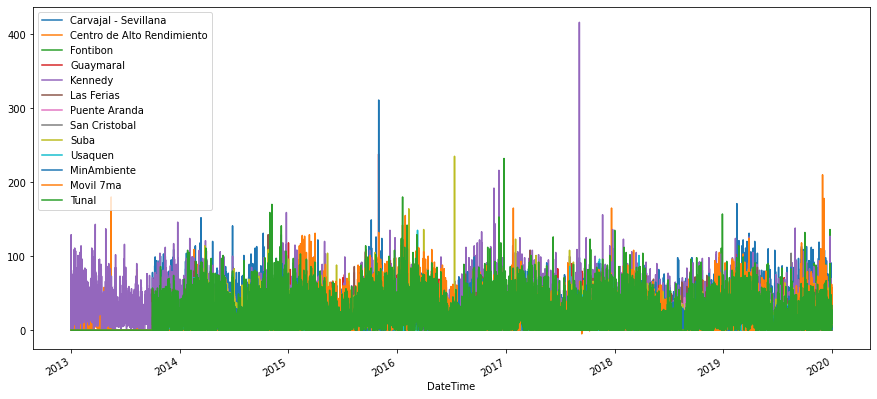

In [4]:
series.plot(x='DateTime',figsize=(15,7))
pyplot.show()

### Eliminar Datos de 2013

In [5]:
series1 = series
series2 = series[(series['DateTime'] >= '2014-01-01')]
series2

,DateTime,Carvajal - Sevillana,Centro de Alto Rendimiento,Fontibon,Guaymaral,Kennedy,Las Ferias,Puente Aranda,San Cristobal,Suba,Usaquen,MinAmbiente,Movil 7ma,Tunal
0,2019-01-01 01:00:00,19,7,16,12,38,7,0,5,19,20,12,18,53
1,2019-01-01 02:00:00,23,20,36,7,75,13,6,11,30,10,6,22,74
2,2019-01-01 03:00:00,37,27,35,8,74,17,13,19,27,15,7,32,59
3,2019-01-01 04:00:00,38,21,29,12,37,11,13,27,48,10,11,46,46
4,2019-01-01 05:00:00,35,15,20,9,24,12,12,29,45,8,11,44,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50365,2014-12-31 19:00:00,19,0,0,1,16,0,0,0,5,4,6,0,22
50366,2014-12-31 20:00:00,33,4,0,1,20,0,0,2,13,2,6,0,22
50367,2014-12-31 21:00:00,46,9,0,1,29,0,0,11,15,4,10,0,34
50368,2014-12-31 22:00:00,48,9,0,5,29,1,0,14,19,4,9,0,20


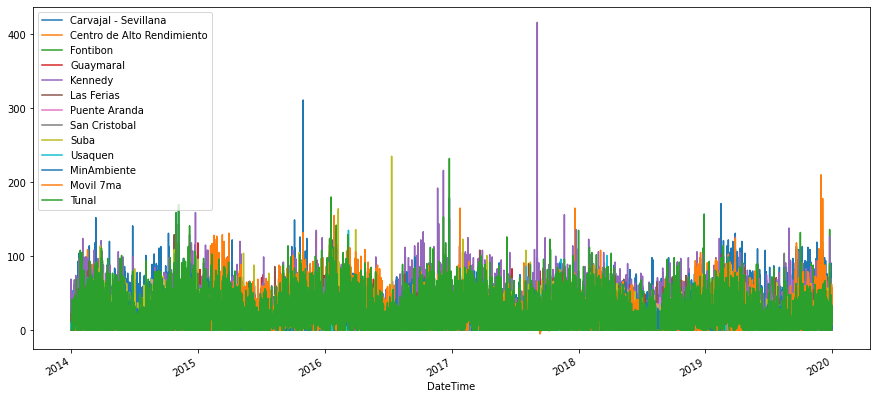

In [6]:
series2.plot(x='DateTime',figsize=(15,7))
pyplot.show()

### Se mapean los valores faltantes en estaciones concretas ejemplo "Centro de Alto Rendimiento"

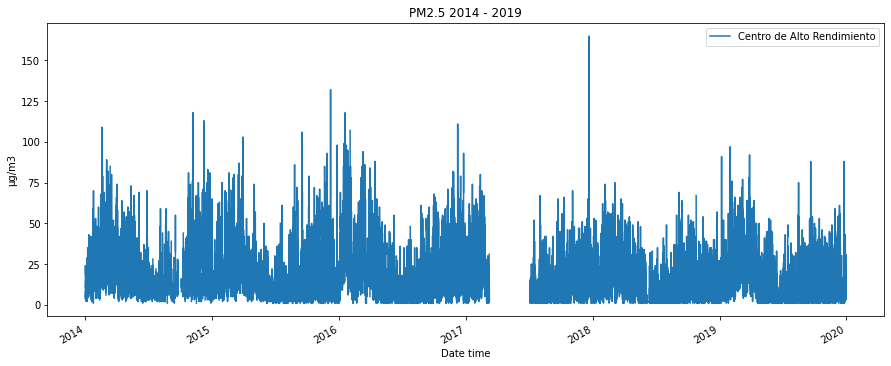

In [7]:
series3 = series2.replace({0:None})
# plot the data
series3.plot(x='DateTime', y='Centro de Alto Rendimiento', figsize=(15,6))
plt.xlabel('Date time')
plt.ylabel('µg/m3')
plt.title('PM2.5 2014 - 2019');

### Se determinan los valores nulos presentes en la data de la estación

In [8]:
NullValues = pd.isnull(series3["Centro de Alto Rendimiento"]).values.ravel().sum()
NullValues

8311

### Tamaño del dataframe total

In [9]:
SizeDF = (len(series3.index))
SizeDF

50370

### Porcentaje de valores nulos en la data de "Centro de Alto Rendimiento"

In [10]:
(NullValues * 100 )/SizeDF

16.499900734564225

In [11]:
series3

,DateTime,Carvajal - Sevillana,Centro de Alto Rendimiento,Fontibon,Guaymaral,Kennedy,Las Ferias,Puente Aranda,San Cristobal,Suba,Usaquen,MinAmbiente,Movil 7ma,Tunal
0,2019-01-01 01:00:00,19,7,16,12,38,7,None,5,19,20,12,18,53
1,2019-01-01 02:00:00,23,20,36,7,75,13,6,11,30,10,6,22,74
2,2019-01-01 03:00:00,37,27,35,8,74,17,13,19,27,15,7,32,59
3,2019-01-01 04:00:00,38,21,29,12,37,11,13,27,48,10,11,46,46
4,2019-01-01 05:00:00,35,15,20,9,24,12,12,29,45,8,11,44,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50365,2014-12-31 19:00:00,19,None,None,1,16,None,None,None,5,4,6,None,22
50366,2014-12-31 20:00:00,33,4,None,1,20,None,None,2,13,2,6,None,22
50367,2014-12-31 21:00:00,46,9,None,1,29,None,None,11,15,4,10,None,34
50368,2014-12-31 22:00:00,48,9,None,5,29,1,None,14,19,4,9,None,20


In [12]:
series3 = series3.fillna(method="ffill")
series3

,DateTime,Carvajal - Sevillana,Centro de Alto Rendimiento,Fontibon,Guaymaral,Kennedy,Las Ferias,Puente Aranda,San Cristobal,Suba,Usaquen,MinAmbiente,Movil 7ma,Tunal
0,2019-01-01 01:00:00,19,7,16,12,38,7,NaN,5,19,20,12,18,53
1,2019-01-01 02:00:00,23,20,36,7,75,13,6.0,11,30,10,6,22,74
2,2019-01-01 03:00:00,37,27,35,8,74,17,13.0,19,27,15,7,32,59
3,2019-01-01 04:00:00,38,21,29,12,37,11,13.0,27,48,10,11,46,46
4,2019-01-01 05:00:00,35,15,20,9,24,12,12.0,29,45,8,11,44,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50365,2014-12-31 19:00:00,19,2,11,1,16,10,21.0,1,5,4,6,8,22
50366,2014-12-31 20:00:00,33,4,11,1,20,10,21.0,2,13,2,6,8,22
50367,2014-12-31 21:00:00,46,9,11,1,29,10,21.0,11,15,4,10,8,34
50368,2014-12-31 22:00:00,48,9,11,5,29,1,21.0,14,19,4,9,8,20


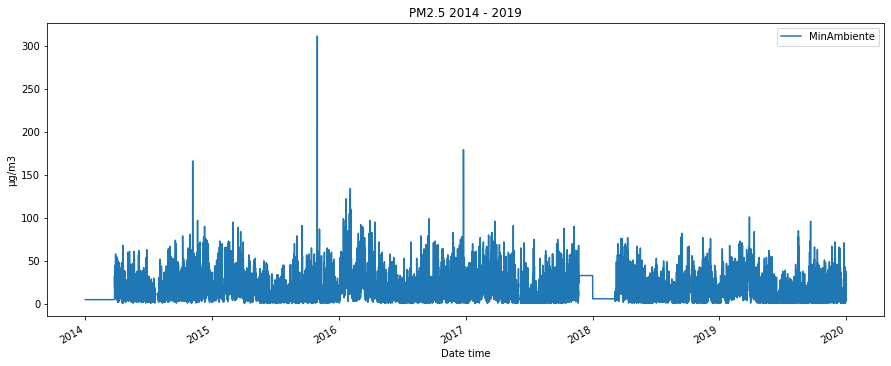

In [19]:
series3.plot(x='DateTime', y='MinAmbiente', figsize=(15,6))
plt.xlabel('Date time')
plt.ylabel('µg/m3')
plt.title('PM2.5 2014 - 2019');

### Implementación de metodo ARIMA para pronosticar datos faltantes

In [58]:
from datetime import datetime
def parser(x):
	return datetime.strptime(x,'%Y-%m-%d %H:%M:%S')
 
series2 = pd.read_csv('./DataMiningUSA/DataEntrenamiento3.csv', index_col=0, squeeze=True, date_parser=parser)
series2.head()

DateTime
2019-01-01 01:00:00     7
2019-01-01 02:00:00    20
2019-01-01 03:00:00    27
2019-01-01 04:00:00    21
2019-01-01 05:00:00    15
Name: Centro de Alto Rendimiento, dtype: int64

In [ ]:
autocorrelation_plot(series2,figsize=(15,6))
pyplot.show()

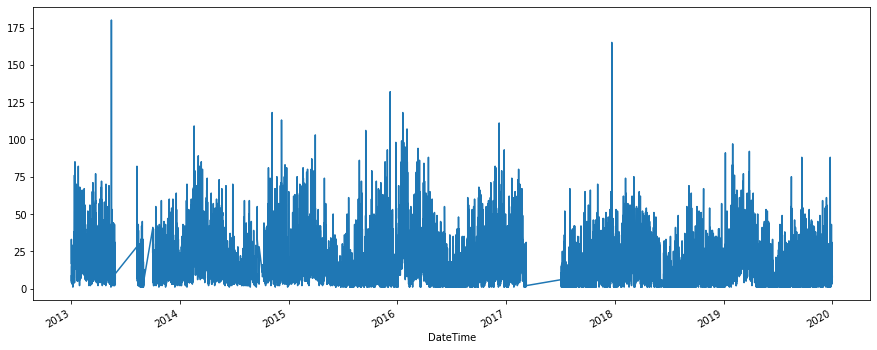

In [60]:
series2.plot(figsize=(15,6))
pyplot.show()

In [61]:
NullValues = pd.isnull(series2).values.ravel().sum()
NullValues

0

In [62]:
# fit model
model = ARIMA(series2, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())


/home/felipeolivares/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/felipeolivares/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/home/felipeolivares/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/felipeolivares/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:220: ValueWarning: A date index has bee

                                  ARIMA Model Results                                   
Dep. Variable:     D.Centro de Alto Rendimiento   No. Observations:                47525
Model:                           ARIMA(5, 1, 0)   Log Likelihood             -166880.036
Method:                                 css-mle   S.D. of innovations              8.105
Date:                          Thu, 30 Jul 2020   AIC                         333774.073
Time:                                  17:02:55   BIC                         333835.456
Sample:                                       1   HQIC                        333793.346
                                                                                        
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.0001      0.019     -0.006      0.995    

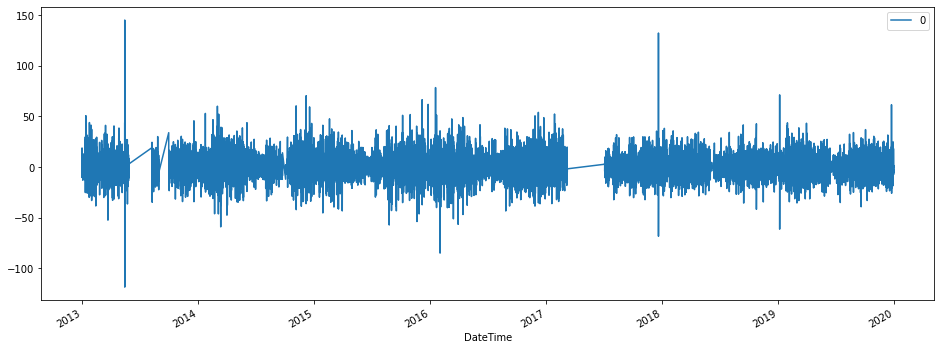

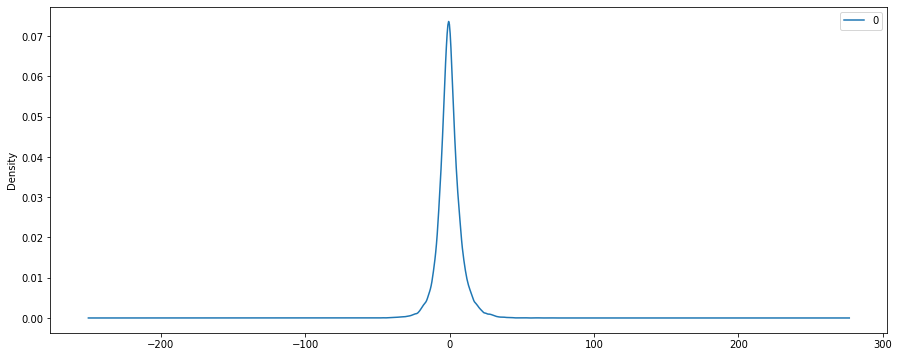

                  0
count  47525.000000
mean       0.000188
std        8.105062
min     -118.370803
25%       -4.098802
50%       -0.351571
75%        3.727529
max      145.128277


In [64]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(16,6))
pyplot.show()
residuals.plot(kind='kde',figsize=(15,6))
pyplot.show()
print(residuals.describe())

In [65]:
series5 = pd.read_csv('./DataMiningUSA/DataEntrenamiento2.csv', index_col=0, squeeze=True, date_parser=parser)
series5.head()

DateTime
2019-01-01 01:00:00     7
2019-01-01 02:00:00    20
2019-01-01 03:00:00    27
2019-01-01 04:00:00    21
2019-01-01 05:00:00    15
Name: Centro de Alto Rendimiento, dtype: int64

In [ ]:
X = series5.values
train, test = train_test_split(series2, test_size = 0.8
                               
                               0, shuffle = False)
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    predict = output[0]
    predictions.append(predict)
    real = test[t]
    history.append(real)
    print('predicted=%f, expected=%f' % (predict, real))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=21.159640, expected=18.000000
predicted=20.516387, expected=23.000000
predicted=21.591941, expected=33.000000
predicted=30.215613, expected=25.000000
predicted=23.083798, expected=14.000000
predicted=14.711972, expected=13.000000
predicted=14.021357, expected=10.000000
predicted=12.419226, expected=15.000000
predicted=17.501224, expected=19.000000
predicted=19.556685, expected=16.000000
predicted=15.653139, expected=14.000000
predicted=13.762498, expected=17.000000
predicted=16.057181, expected=17.000000
predicted=16.815259, expected=20.000000
predicted=19.701284, expected=23.000000
predicted=21.813829, expected=17.000000
predicted=16.670400, expected=39.000000
predicted=35.330706, expected=55.000000
predicted=49.009341, expected=54.000000
predicted=48.670829, expected=20.000000
predicted=20.563339, expected=16.000000
predicted=16.999085, expected=11.000000
predicted=16.134672, expected=11.000000
predicted=17.823768, expected=22.000000
predicted=25.862837, expected=16.000000


predicted=19.779363, expected=19.000000
predicted=18.780157, expected=18.000000
predicted=18.835152, expected=21.000000
predicted=21.311388, expected=51.000000
predicted=45.800844, expected=40.000000
predicted=36.734607, expected=35.000000
predicted=32.428462, expected=21.000000
predicted=20.811541, expected=27.000000
predicted=27.054045, expected=15.000000
predicted=20.470873, expected=21.000000
predicted=23.763643, expected=17.000000
predicted=19.453212, expected=24.000000
predicted=23.632400, expected=18.000000
predicted=19.094620, expected=25.000000
predicted=23.528888, expected=21.000000
predicted=20.931155, expected=30.000000
predicted=28.061339, expected=50.000000
predicted=45.519365, expected=53.000000
predicted=47.632390, expected=62.000000
predicted=55.897355, expected=51.000000
predicted=46.682773, expected=40.000000
predicted=39.173443, expected=22.000000
predicted=26.731079, expected=47.000000
predicted=48.058994, expected=65.000000
predicted=64.056600, expected=47.000000


predicted=9.508724, expected=9.000000
predicted=9.634716, expected=9.000000
predicted=9.020657, expected=8.000000
predicted=7.789627, expected=16.000000
predicted=14.740695, expected=14.000000
predicted=12.961159, expected=8.000000
predicted=8.200827, expected=5.000000
predicted=5.645498, expected=1.000000
predicted=2.450139, expected=5.000000
predicted=6.659552, expected=5.000000
predicted=6.226458, expected=5.000000
predicted=5.363020, expected=1.000000
predicted=1.533565, expected=9.000000
predicted=7.794622, expected=7.000000
predicted=6.694331, expected=14.000000
predicted=12.482580, expected=13.000000
predicted=11.587728, expected=13.000000
predicted=11.350791, expected=17.000000
predicted=15.619962, expected=7.000000
predicted=7.333236, expected=11.000000
predicted=11.411635, expected=13.000000
predicted=12.996909, expected=9.000000
predicted=9.804496, expected=5.000000
predicted=6.602475, expected=9.000000
predicted=8.797833, expected=3.000000
predicted=4.403961, expected=9.000

predicted=18.183083, expected=30.000000
predicted=28.591421, expected=35.000000
predicted=32.494111, expected=34.000000
predicted=30.293238, expected=32.000000
predicted=29.622191, expected=20.000000
predicted=20.150893, expected=18.000000
predicted=20.140653, expected=12.000000
predicted=15.730357, expected=5.000000
predicted=9.642840, expected=14.000000
predicted=16.337672, expected=20.000000
predicted=19.867008, expected=23.000000
predicted=21.928140, expected=25.000000
predicted=22.627288, expected=24.000000
predicted=21.305840, expected=17.000000
predicted=16.820163, expected=13.000000
predicted=14.279425, expected=2.000000
predicted=5.564255, expected=10.000000
predicted=12.282217, expected=15.000000
predicted=16.140650, expected=15.000000
predicted=15.159912, expected=14.000000
predicted=13.431163, expected=18.000000
predicted=15.694457, expected=21.000000
predicted=19.396061, expected=28.000000
predicted=25.839873, expected=40.000000
predicted=35.834670, expected=31.000000
pred

predicted=1.834986, expected=4.000000
predicted=4.654977, expected=6.000000
predicted=5.904479, expected=6.000000
predicted=5.655904, expected=1.000000
predicted=1.433695, expected=7.000000
predicted=6.074959, expected=7.000000
predicted=6.599098, expected=5.000000
predicted=5.154260, expected=5.000000
predicted=4.987622, expected=10.000000
predicted=8.712298, expected=10.000000
predicted=9.503269, expected=10.000000
predicted=9.421369, expected=9.000000
predicted=8.376371, expected=8.000000
predicted=7.716499, expected=6.000000
predicted=6.676454, expected=7.000000
predicted=7.475339, expected=8.000000
predicted=8.275696, expected=8.000000
predicted=8.114029, expected=8.000000
predicted=7.922588, expected=13.000000
predicted=11.843290, expected=12.000000
predicted=11.235087, expected=13.000000
predicted=12.162172, expected=16.000000
predicted=14.681335, expected=4.000000
predicted=4.979300, expected=9.000000
predicted=9.551197, expected=12.000000
predicted=12.039715, expected=4.000000

predicted=13.877322, expected=15.000000
predicted=15.912970, expected=20.000000
predicted=20.941109, expected=27.000000
predicted=25.588240, expected=7.000000
predicted=9.038264, expected=8.000000
predicted=8.616151, expected=3.000000
predicted=5.351976, expected=14.000000
predicted=15.023535, expected=16.000000
predicted=17.029955, expected=15.000000
predicted=13.665648, expected=18.000000
predicted=16.158799, expected=12.000000
predicted=11.049011, expected=12.000000
predicted=12.384953, expected=14.000000
predicted=14.304216, expected=12.000000
predicted=12.613528, expected=16.000000
predicted=16.029011, expected=26.000000
predicted=23.592672, expected=27.000000
predicted=24.583864, expected=22.000000
predicted=20.643427, expected=21.000000
predicted=19.727456, expected=14.000000
predicted=14.840189, expected=9.000000
predicted=11.875491, expected=9.000000
predicted=11.784916, expected=13.000000
predicted=14.382651, expected=3.000000
predicted=5.790750, expected=9.000000
predicted=9

predicted=15.905297, expected=9.000000
predicted=9.837186, expected=9.000000
predicted=9.368178, expected=10.000000
predicted=10.948670, expected=10.000000
predicted=10.745678, expected=5.000000
predicted=6.732829, expected=2.000000
predicted=3.198633, expected=3.000000
predicted=4.033913, expected=1.000000
predicted=2.509809, expected=3.000000
predicted=3.896335, expected=8.000000
predicted=7.320048, expected=2.000000
predicted=2.125113, expected=5.000000
predicted=4.512040, expected=10.000000
predicted=8.572508, expected=4.000000
predicted=4.098450, expected=6.000000
predicted=6.032489, expected=34.000000
predicted=28.441609, expected=23.000000
predicted=20.412129, expected=18.000000
predicted=16.381612, expected=5.000000
predicted=5.309503, expected=18.000000
predicted=16.882823, expected=16.000000
predicted=18.627374, expected=10.000000
predicted=11.903038, expected=9.000000
predicted=10.050262, expected=8.000000
predicted=8.066568, expected=11.000000
predicted=11.996939, expected=

predicted=7.377800, expected=2.000000
predicted=2.477486, expected=4.000000
predicted=4.510637, expected=10.000000
predicted=10.064065, expected=15.000000
predicted=13.563431, expected=21.000000
predicted=18.446277, expected=25.000000
predicted=21.196028, expected=18.000000
predicted=16.039256, expected=33.000000
predicted=29.144712, expected=10.000000
predicted=11.579608, expected=9.000000
predicted=11.029083, expected=4.000000
predicted=7.562575, expected=11.000000
predicted=12.516787, expected=6.000000
predicted=9.639275, expected=18.000000
predicted=16.319245, expected=25.000000
predicted=22.094419, expected=3.000000
predicted=3.733230, expected=13.000000
predicted=12.308423, expected=7.000000
predicted=7.660278, expected=9.000000
predicted=10.529377, expected=4.000000
predicted=6.774952, expected=15.000000
predicted=13.157563, expected=4.000000
predicted=5.507315, expected=8.000000
predicted=7.718754, expected=10.000000
predicted=9.750673, expected=8.000000
predicted=7.720426, exp

predicted=5.788765, expected=5.000000
predicted=5.857823, expected=4.000000
predicted=5.080245, expected=3.000000
predicted=4.487598, expected=7.000000
predicted=8.464965, expected=2.000000
predicted=2.602130, expected=10.000000
predicted=8.920018, expected=8.000000
predicted=7.396930, expected=4.000000
predicted=3.989244, expected=2.000000
predicted=2.741992, expected=5.000000
predicted=4.783280, expected=2.000000
predicted=3.294761, expected=2.000000
predicted=2.795855, expected=10.000000
predicted=8.790617, expected=3.000000
predicted=3.079688, expected=2.000000
predicted=2.340564, expected=7.000000
predicted=6.169900, expected=3.000000
predicted=3.201962, expected=4.000000
predicted=4.644958, expected=4.000000
predicted=3.855722, expected=1.000000
predicted=1.399956, expected=3.000000
predicted=3.464805, expected=1.000000
predicted=1.436075, expected=3.000000
predicted=3.086725, expected=7.000000
predicted=6.316699, expected=5.000000
predicted=4.427070, expected=3.000000
predicted=

predicted=10.188996, expected=8.000000
predicted=8.288897, expected=2.000000
predicted=3.569150, expected=1.000000
predicted=3.316166, expected=2.000000
predicted=3.875792, expected=14.000000
predicted=13.059716, expected=5.000000
predicted=5.446683, expected=3.000000
predicted=2.754217, expected=5.000000
predicted=4.484017, expected=4.000000
predicted=4.131360, expected=7.000000
predicted=7.694898, expected=10.000000
predicted=9.034540, expected=21.000000
predicted=17.793573, expected=6.000000
predicted=6.141823, expected=11.000000
predicted=9.776676, expected=10.000000
predicted=9.842485, expected=2.000000
predicted=3.827887, expected=3.000000
predicted=5.406473, expected=7.000000
predicted=6.995545, expected=13.000000
predicted=12.416418, expected=13.000000
predicted=12.146400, expected=9.000000
predicted=7.950922, expected=17.000000
predicted=14.685474, expected=20.000000
predicted=18.037260, expected=17.000000
predicted=16.313795, expected=9.000000
predicted=9.728429, expected=14.

predicted=6.419533, expected=35.000000
predicted=28.659462, expected=29.000000
predicted=24.916136, expected=5.000000
predicted=4.968313, expected=6.000000
predicted=6.368215, expected=7.000000
predicted=8.281415, expected=8.000000
predicted=12.078726, expected=7.000000
predicted=9.708971, expected=10.000000
predicted=9.127040, expected=9.000000
predicted=8.579025, expected=19.000000
predicted=16.750021, expected=13.000000
predicted=12.304047, expected=2.000000
predicted=3.154837, expected=4.000000
predicted=5.024524, expected=11.000000
predicted=10.947045, expected=13.000000
predicted=13.613001, expected=12.000000
predicted=11.693998, expected=15.000000
predicted=12.863760, expected=14.000000
predicted=12.663631, expected=7.000000
predicted=7.899076, expected=8.000000
predicted=8.798623, expected=17.000000
predicted=16.107325, expected=13.000000
predicted=13.337072, expected=5.000000
predicted=6.356280, expected=7.000000
predicted=7.086219, expected=3.000000
predicted=4.343667, expect

predicted=6.544910, expected=7.000000
predicted=7.168141, expected=6.000000
predicted=6.057964, expected=8.000000
predicted=7.261556, expected=7.000000
predicted=6.997544, expected=7.000000
predicted=6.852656, expected=8.000000
predicted=7.782439, expected=1.000000
predicted=2.104704, expected=2.000000
predicted=2.929031, expected=2.000000
predicted=2.894305, expected=2.000000
predicted=2.826707, expected=1.000000
predicted=1.910351, expected=2.000000
predicted=1.845816, expected=3.000000
predicted=2.810772, expected=5.000000
predicted=4.427460, expected=3.000000
predicted=2.841778, expected=4.000000
predicted=3.502714, expected=13.000000
predicted=10.980491, expected=1.000000
predicted=1.723594, expected=8.000000
predicted=7.162579, expected=4.000000
predicted=4.127504, expected=7.000000
predicted=6.665091, expected=3.000000
predicted=4.354360, expected=17.000000
predicted=14.176168, expected=11.000000
predicted=10.544425, expected=5.000000
predicted=4.992306, expected=3.000000
predic

/home/felipeolivares/.local/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


predicted=11.392850, expected=8.000000
predicted=8.598210, expected=4.000000
predicted=5.206836, expected=7.000000
predicted=8.695781, expected=4.000000
predicted=5.965767, expected=3.000000
predicted=4.445394, expected=13.000000
predicted=11.760089, expected=2.000000
predicted=2.752120, expected=10.000000
predicted=9.066302, expected=3.000000
predicted=3.469718, expected=2.000000
predicted=2.479526, expected=1.000000
predicted=2.684443, expected=3.000000
predicted=3.070468, expected=3.000000
predicted=3.881423, expected=7.000000
predicted=6.152801, expected=2.000000
predicted=2.110267, expected=1.000000
predicted=1.079015, expected=2.000000
predicted=2.201876, expected=3.000000
predicted=3.112331, expected=2.000000
predicted=2.642354, expected=4.000000
predicted=3.564313, expected=3.000000
predicted=2.747057, expected=5.000000
predicted=4.459504, expected=4.000000
predicted=3.838078, expected=5.000000
predicted=4.529248, expected=11.000000
predicted=9.636426, expected=15.000000
predic

predicted=4.321554, expected=4.000000
predicted=4.176808, expected=1.000000
predicted=1.944254, expected=2.000000
predicted=2.614195, expected=2.000000
predicted=2.983239, expected=4.000000
predicted=3.914769, expected=2.000000
predicted=2.269368, expected=4.000000
predicted=3.466093, expected=4.000000
predicted=3.688802, expected=4.000000
predicted=3.720255, expected=12.000000
predicted=10.353066, expected=3.000000
predicted=3.170248, expected=8.000000
predicted=7.128956, expected=12.000000
predicted=10.653107, expected=9.000000
predicted=8.491113, expected=3.000000
predicted=4.305732, expected=5.000000
predicted=4.869167, expected=8.000000
predicted=8.106349, expected=15.000000
predicted=14.111657, expected=24.000000
predicted=20.953174, expected=9.000000
predicted=8.469404, expected=1.000000
predicted=2.017213, expected=5.000000
predicted=5.861863, expected=3.000000
predicted=5.419438, expected=3.000000
predicted=5.811968, expected=10.000000
predicted=9.329562, expected=12.000000
pr

predicted=8.213268, expected=4.000000
predicted=4.631270, expected=1.000000
predicted=1.987567, expected=6.000000
predicted=5.677908, expected=1.000000
predicted=1.842038, expected=5.000000
predicted=5.141251, expected=3.000000
predicted=3.170538, expected=1.000000
predicted=1.223160, expected=3.000000
predicted=3.260101, expected=4.000000
predicted=3.636614, expected=1.000000
predicted=1.657064, expected=2.000000
predicted=2.052378, expected=3.000000
predicted=2.744375, expected=4.000000
predicted=3.813381, expected=4.000000
predicted=3.864966, expected=8.000000
predicted=6.726845, expected=9.000000
predicted=7.832734, expected=3.000000
predicted=3.210990, expected=6.000000
predicted=5.581950, expected=4.000000
predicted=4.291974, expected=8.000000
predicted=7.849852, expected=6.000000
predicted=6.340984, expected=13.000000
predicted=11.167076, expected=5.000000
predicted=5.385338, expected=5.000000
predicted=4.941832, expected=12.000000
predicted=11.108716, expected=4.000000
predicte

predicted=7.688163, expected=2.000000
predicted=2.925996, expected=3.000000
predicted=3.251642, expected=5.000000
predicted=5.391481, expected=3.000000
predicted=3.165136, expected=4.000000
predicted=4.485277, expected=1.000000
predicted=1.347033, expected=2.000000
predicted=2.199382, expected=1.000000
predicted=1.652332, expected=2.000000
predicted=2.150523, expected=1.000000
predicted=1.422242, expected=2.000000
predicted=1.823635, expected=1.000000
predicted=1.173043, expected=9.000000
predicted=7.391830, expected=1.000000
predicted=1.427551, expected=8.000000
predicted=6.531923, expected=2.000000
predicted=2.286335, expected=7.000000
predicted=6.051420, expected=1.000000
predicted=2.306536, expected=5.000000
predicted=4.407051, expected=7.000000
predicted=6.913274, expected=1.000000
predicted=1.538327, expected=7.000000
predicted=6.517880, expected=3.000000
predicted=3.048953, expected=2.000000
predicted=2.542897, expected=2.000000
predicted=2.643825, expected=2.000000
predicted=2.

predicted=8.623194, expected=4.000000
predicted=4.521676, expected=7.000000
predicted=6.965930, expected=7.000000
predicted=6.535625, expected=5.000000
predicted=5.370503, expected=19.000000
predicted=16.313504, expected=46.000000
predicted=38.051672, expected=55.000000
predicted=46.456028, expected=18.000000
predicted=17.255102, expected=8.000000
predicted=8.582735, expected=4.000000
predicted=8.339187, expected=10.000000
predicted=16.188767, expected=1.000000
predicted=8.736139, expected=10.000000
predicted=10.479011, expected=5.000000
predicted=5.630159, expected=2.000000
predicted=2.583653, expected=6.000000
predicted=6.214638, expected=9.000000
predicted=7.947982, expected=8.000000
predicted=8.087576, expected=19.000000
predicted=16.083528, expected=12.000000
predicted=10.779268, expected=9.000000
predicted=8.631189, expected=5.000000
predicted=5.910620, expected=15.000000
predicted=13.937252, expected=17.000000
predicted=16.962008, expected=25.000000
predicted=22.247510, expected

predicted=9.526886, expected=2.000000
predicted=2.627872, expected=2.000000
predicted=3.525606, expected=6.000000
predicted=5.589441, expected=4.000000
predicted=4.950325, expected=6.000000
predicted=6.323482, expected=7.000000
predicted=6.150549, expected=6.000000
predicted=5.509690, expected=2.000000
predicted=2.741143, expected=4.000000
predicted=4.041502, expected=8.000000
predicted=7.581194, expected=4.000000
predicted=4.559228, expected=3.000000
predicted=3.345916, expected=7.000000
predicted=6.156240, expected=3.000000
predicted=3.478675, expected=10.000000
predicted=9.177767, expected=1.000000
predicted=1.845543, expected=5.000000
predicted=4.626279, expected=10.000000
predicted=9.231171, expected=6.000000
predicted=5.861597, expected=5.000000
predicted=5.456701, expected=2.000000
predicted=2.197740, expected=9.000000
predicted=8.280129, expected=8.000000
predicted=8.194549, expected=1.000000
predicted=1.985361, expected=2.000000
predicted=2.400916, expected=6.000000
predicted=

predicted=5.420842, expected=12.000000
predicted=10.146917, expected=12.000000
predicted=10.319126, expected=2.000000
predicted=2.636131, expected=2.000000
predicted=2.985686, expected=4.000000
predicted=4.614525, expected=6.000000
predicted=6.887583, expected=10.000000
predicted=9.680033, expected=15.000000
predicted=12.570123, expected=16.000000
predicted=13.638817, expected=8.000000
predicted=7.714062, expected=10.000000
predicted=9.474353, expected=7.000000
predicted=7.920606, expected=4.000000
predicted=5.999238, expected=7.000000
predicted=8.067907, expected=7.000000
predicted=7.261376, expected=2.000000
predicted=3.382270, expected=9.000000
predicted=8.266893, expected=6.000000
predicted=5.931132, expected=10.000000
predicted=9.270077, expected=4.000000
predicted=4.548236, expected=7.000000
predicted=6.342838, expected=4.000000
predicted=4.874985, expected=1.000000
predicted=2.123547, expected=8.000000
predicted=7.816167, expected=3.000000
predicted=3.495756, expected=5.000000
p

predicted=18.226460, expected=1.000000
predicted=2.947450, expected=19.000000
predicted=15.565652, expected=15.000000
predicted=13.231691, expected=11.000000
predicted=11.105792, expected=15.000000
predicted=14.992588, expected=17.000000
predicted=15.056741, expected=12.000000
predicted=13.160519, expected=9.000000
predicted=9.965567, expected=13.000000
predicted=12.735835, expected=11.000000
predicted=11.850701, expected=10.000000
predicted=10.965299, expected=8.000000
predicted=8.646395, expected=11.000000
predicted=10.735096, expected=15.000000
predicted=14.403325, expected=17.000000
predicted=15.812140, expected=21.000000
predicted=18.846563, expected=27.000000
predicted=23.653214, expected=5.000000
predicted=7.065043, expected=7.000000
predicted=8.416134, expected=13.000000
predicted=13.783524, expected=9.000000
predicted=11.398132, expected=10.000000
predicted=11.789003, expected=6.000000
predicted=6.126282, expected=13.000000
predicted=11.974644, expected=12.000000
predicted=12.